In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
from astropy.time import Time

from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle

In [23]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

Text(0, 0.5, 'TSI (W/m$^2$)')

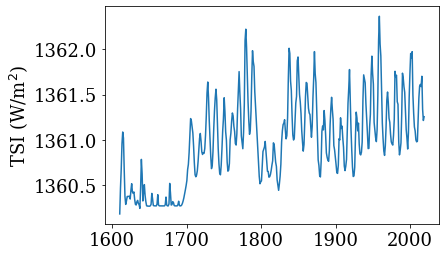

In [7]:
lc3 = pd.read_table('data/Historical_TSI_Reconstruction.txt', comment=';', 
                    names=['year', 'TSI'], delim_whitespace=True)
plt.plot(lc3['year'], lc3['TSI'])
plt.ylabel('TSI (W/m$^2$)')

In [8]:
lc2 = pd.read_table('data/sorce_tsi_L3_c06h_latest.txt', comment=';', 
                    names=['nominal_date_yyyymmdd', 'nominal_date_jdn', 'avg_measurement_date_jdn', 
                           'std_dev_measurement_date', 'tsi_1au', 'instrument_accuracy_1au', 
                           'instrument_precision_1au', 'solar_standard_deviation_1au', 
                           'measurement_uncertainty_1au', 'tsi_true_earth', 'instrument_accuracy_true_earth', 
                           'instrument_precision_true_earth', 'solar_standard_deviation_true_earth', 
                           'measurement_uncertainty_true_earth', 'provisional_flag'], 
                    delim_whitespace=True)

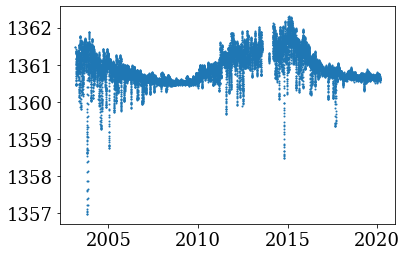

In [34]:
ok2 = lc2['tsi_1au'] > 1
T2 = Time(lc2['nominal_date_jdn'], format='jd')

plt.scatter(T2.to_value('decimalyear')[ok2], lc2['tsi_1au'][ok2], s=1)

(2002.0, 2020.0)

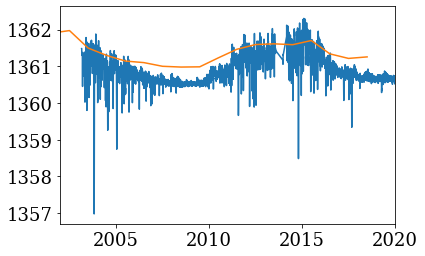

In [86]:
plt.plot(T2.to_value('decimalyear')[ok2], lc2['tsi_1au'][ok2])
plt.plot(lc3['year'], lc3['TSI'])
plt.xlim(2002,2020)

In [126]:
nmode='standard'
freq2, pwr2 = LombScargle(T2.to_value('decimalyear')[ok2], 
                          lc2['tsi_1au'][ok2]/np.nanmedian(lc2['tsi_1au'][ok2]), 
                          normalization=nmode).autopower(minimum_frequency=1/8, maximum_frequency=365)

freq3, pwr3 = LombScargle(lc3['year'], lc3['TSI']/np.nanmedian(lc3['TSI']), 
                          normalization=nmode).autopower(minimum_frequency=1/100, # up to 100yr periods
                                                         maximum_frequency=1/5) # down to 5yr periods

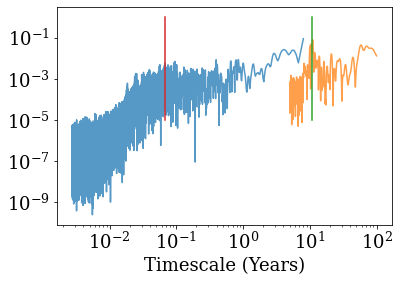

In [128]:
plt.plot(1./freq2, pwr2, alpha=0.75)
plt.plot(1./freq3, pwr3, alpha=0.75)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Timescale (Years)')

plt.plot([10.9, 10.9], [1e-5, 1]) # activity cycle
plt.plot([25/365, 25/365], [1e-5, 1])